<img src=images/film3.jpg width = "1500" height = "4000">

# Its Movie Time!!

#### _By: Sarah, Brendan and Ben_

- - -

## Project Overview

One of the most important in steps in any movie making is pre-production. These stage includes all the 




- note to group: if there is time midweek we will look into what studios did the best
- note to group: the numbers data is NOT adjusted for inflation 

**ASK JELLY/JULIAN FOR DATA DICTIONARY: HOW DOES THE NUMBERS CALCULATE WORLDWIDE? ALSO, SOME MOVIE STUDIOS ARE NOT LOCATED IN THE US, WHAT DOES DOMESTIC MEAN BY THAT?




In [1]:
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
!ls Data

README 2.md im.db.zip 


In [3]:
# Reading all the datasets that will be used for the project
tn_df = pd.read_csv('./tn.movie_budgets.csv.gz')
tn_df = tn_df.rename(columns = {'title': 'movie'})
database = "./im.db"
connection = sql.connect(database)

In [4]:
# connecting sqlite3 cursor
query = ''' SELECT * FROM movie_basics'''
sql_df = pd.read_sql_query(query, connection)
sql_df = sql_df.rename(columns = {'primary_title': 'movie'})

### Data Cleaning And Preparation.

In [5]:
# Starting cleaning the tn_df file by removing all the comma's and $ and make them integers which would be much
# much easier for data manipulation
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [6]:
tn_df['production_budget'] = tn_df['production_budget'].str[1:]
tn_df['production_budget'] = tn_df['production_budget'].str.replace(',', '').astype(np.int64)
tn_df['domestic_gross'] = tn_df['domestic_gross'].str[1:]
tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace(',', '').astype(np.int64)
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str[1:]
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace(',', '').astype(np.int64)

In [7]:
# We will now starting on creating our master dataset by combining both datasets
master_data = tn_df.merge(sql_df, on = 'movie').drop\
(columns = ['original_title', 'start_year', 'id'])

In [8]:
# We will be removing any duplicates from our dataset
master_data = master_data.drop_duplicates(subset  = 'movie').set_index('movie_id')
master_data.tail(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres
movie_id,,,,,,,
tt1836212,"Jan 4, 2013",All Superheroes Must Die,20000,0,0,78.0,"Sci-Fi,Thriller"
tt2357398,"Apr 21, 2015",The Front Man,20000,0,0,73.0,"Biography,Comedy,Documentary"
tt1781935,"Nov 25, 2011",The Ridges,17300,0,0,89.0,"Drama,Horror,Thriller"
tt3973612,"Dec 31, 2014",Stories of Our Lives,15000,0,0,60.0,Drama
tt6619196,"Apr 28, 2006",Clean,10000,138711,138711,70.0,"Comedy,Drama,Horror"
tt1872026,"Jul 6, 2001",Cure,10000,94596,94596,93.0,Drama
tt6616538,"Apr 1, 1996",Bang,10000,527,527,NaN,None
tt1880418,"Jan 13, 2012",Newlyweds,9000,4584,4584,95.0,"Comedy,Drama"
tt7837402,"Dec 31, 2018",Red 11,7000,0,0,77.0,"Horror,Sci-Fi,Thriller"


In [9]:
# We will create a new column for movies released month to help with manipulation of our data
master_data['release_month'] = master_data['release_date'].str[:3]


In [10]:
# The next step is to drop all the NaN and get our data ready for analysis
master_data.dropna(inplace = True)

In [11]:
#creating two ROIs columns: worldwide ROI & domestic ROI
master_data['domestic_ROI_perc'] = (master_data['domestic_gross'] - master_data['production_budget']) / master_data['production_budget'] * 100

master_data['worldwide_ROI_perc'] =(master_data['worldwide_gross'] - master_data['production_budget']) / master_data['production_budget'] * 100

In [12]:
master_data.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,release_month,domestic_ROI_perc,worldwide_ROI_perc
movie_id,,,,,,,,,,
tt1775309,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,93.0,Horror,Dec,78.942971,553.257713
tt1298650,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,136.0,"Action,Adventure,Fantasy",May,-41.289850,154.667286
tt6565702,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,113.0,"Action,Adventure,Sci-Fi",Jun,-87.782186,-57.210757
tt2395427,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,141.0,"Action,Adventure,Sci-Fi",May,38.840250,324.384139
tt4154756,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,149.0,"Action,Adventure,Sci-Fi",Apr,126.271827,582.711400


### Figure 1A: Domestic ROI in Percentage by Release Month

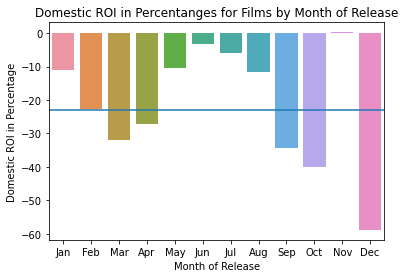

In [13]:
#GRAPH 1: DOMESTIC ROI BY RELEASE MONTH --> PUT MEDIAN ESTIMATOR IN VIA POWER POINT
#risk tolerances, the typical feb month
#if we group eveythhing in this month, the average ROI is this (top of the bar) --> seaborn uses mean by default --> i put it as median
#the horizontal line shows the median domestic ROI for all films in the data set

from numpy import median
fig, ax = plt.subplots()
#setting x and y variables
y1 = master_data['domestic_ROI_perc']
x1 = master_data['release_month']
#graphing variables
ax = sns.barplot(x=x1, y=y1, data=master_data,ci=None, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], estimator=median)
#setting lables and titles and y-axis range
ax.set_title("Domestic ROI in Percentanges for Films by Month of Release")
ax.set_ylabel("Domestic ROI in Percentage")
ax.set_xlabel("Month of Release")
#display median
ax.axhline(master_data['domestic_ROI_perc'].median())
#other edits i can do
    #use the mean for the top of the bar --> show the mean all across

### Figure 1B: Worldwide ROI in Percentage by Release Month

In [14]:
#DRAFT OF GRAPH 1

#going to start making graphs showing the relationsships between ROI and release month 

#graph 1: release month & domestic roi
#y = master_data['domestic_ROI_perc']
#x = master_data['release_month']

#fig, ax = plt.subplots()
#ax.bar(x,y)

#quesstionss to investigate: how to make a graph to see negativee values, is doing ROI in percent better or should i do plain numbers 
#possible explanations: from the wiki for the oscars; the oscars are usually held in mid to late february or march --> oscars happen and there is a boost in ticket sales or rental/streaming purchaes
#maybe a lot of new releasess come out in jnaury in time for the osccars and other film awards

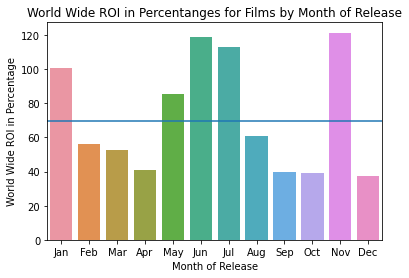

In [15]:
#graph 2: world wide roi and release month
#NOTE: WORLD WIDE ROI INCLUDES DOMESTIC ROI
from numpy import median
fig, ax = plt.subplots()
#setting x and y variables
y2= master_data['worldwide_ROI_perc']
x2 = master_data['release_month']
#graphing variables
ax = sns.barplot(x=x2, y=y2, data=master_data,ci=None, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], estimator=median)
#setting lables and titles and y-axis range
ax.set_title("World Wide ROI in Percentanges for Films by Month of Release")
ax.set_ylabel("World Wide ROI in Percentage")
ax.set_xlabel("Month of Release")
#display median
ax.axhline(master_data['worldwide_ROI_perc'].median())
#other edits i can do
    #use the mean for the top of the bar --> show the mean all across

In [16]:
#DRAFT: graph 2: release month & worldwide_ROI
#y= master_data['worldwide_ROI_perc']
#x = master_data['release_month']

#fig, ax = plt.subplots()
#ax.bar(x,y)

#intial insights: similar pattern as domestic, esp with that feburary thing --> much greater increase for january (could be holiday season, people want or need something to do bc most things are closed and also awards season )

In [17]:
chart_1 = master_data['runtime_minutes'].to_frame().join(master_data['worldwide_ROI_perc'])

Text(0.5, 0, 'Runtime Minutes')

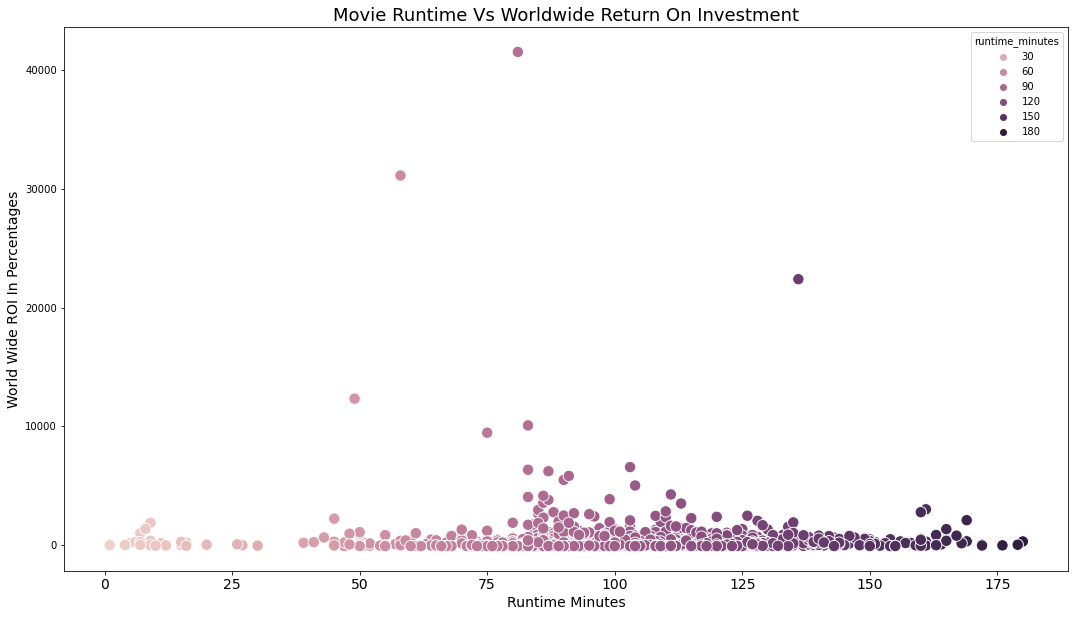

In [18]:
# Visualization of runtime vs worldwide return on investment using Seaborn .
fig, ax = plt.subplots(1,1, figsize = (18, 10))
plt.xticks(fontsize=14, rotation=0)
x_df= chart_1['runtime_minutes']
y_df = chart_1['worldwide_ROI_perc']
ax= sns.scatterplot(x = x_df, y = y_df, data = chart_1, hue = 'runtime_minutes', s = 130)

# Setting titles and adjusting the font size.
ax.set_title("Movie Runtime Vs Worldwide Return On Investment", fontsize = 18)
ax.set_ylabel("World Wide ROI In Percentages", fontsize = 14)
ax.set_xlabel("Runtime Minutes", fontsize = 14)

In [19]:
# As showing in our chart above, movies between 80 - 135 minutes of runtime to generate more revenue worldwide

In [20]:
# The average movie runtime is around 105.00 with a 141% in ROI
chart_1.describe()

,runtime_minutes,worldwide_ROI_perc
count,2131.000000,2131.000000
mean,102.025809,269.580988
std,21.682337,1386.114581
min,1.000000,-100.000000
25%,90.000000,-62.415420
50%,101.000000,69.642556
75%,113.000000,265.626834
max,180.000000,41556.474000


In [21]:
chart_2 = master_data['runtime_minutes'].to_frame().join(master_data['domestic_ROI_perc'])

Text(0.5, 0, 'Runtime Minutes')

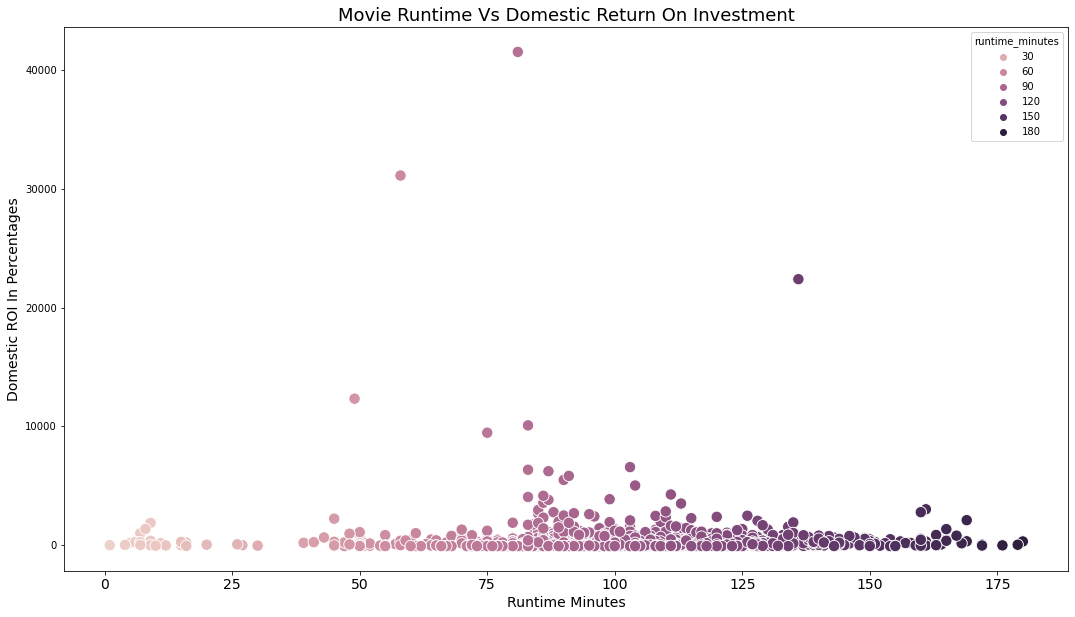

In [22]:
# Visualization of runtime vs worldwide return on investment using Seaborn .
fig, ax = plt.subplots(1,1, figsize = (18, 10))
plt.xticks(fontsize=14, rotation=0)
x_2= chart_2['runtime_minutes']
y_2 = chart_2['domestic_ROI_perc']
ax= sns.scatterplot(x = x_df, y = y_df, data = chart_1, hue = 'runtime_minutes', s = 130)

# Setting titles and adjusting the font size.
ax.set_title("Movie Runtime Vs Domestic Return On Investment", fontsize = 18)
ax.set_ylabel("Domestic ROI In Percentages", fontsize = 14)
ax.set_xlabel("Runtime Minutes", fontsize = 14)

In [23]:
# Most of the movies are between 80 - 130 minutes.
# Domestic median ROI is about 10.6% compared to worldwide which is around 141% in ROI

In [24]:
chart_2.describe()

,runtime_minutes,domestic_ROI_perc
count,2131.000000,2131.000000
mean,102.025809,97.958780
std,21.682337,773.776451
min,1.000000,-100.000000
25%,90.000000,-85.472797
50%,101.000000,-22.922454
75%,113.000000,82.772138
max,180.000000,22664.410000


In [25]:
master_data = master_data.drop_duplicates(subset  = 'movie').set_index('movie')

In [26]:
genre = master_data['genres'].to_frame().join(master_data['worldwide_ROI_perc'])
genre

,genres,worldwide_ROI_perc
movie,,
Avatar,Horror,553.257713
Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",154.667286
Dark Phoenix,"Action,Adventure,Sci-Fi",-57.210757
Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",324.384139
Avengers: Infinity War,"Action,Adventure,Sci-Fi",582.711400
...,...,...
Clean,"Comedy,Drama,Horror",1287.110000
Cure,Drama,845.960000
Newlyweds,"Comedy,Drama",-49.066667


In [27]:
Action = genre[(genre.genres.str.contains('Action'))]
Action['worldwide_ROI_perc'].median()

103.19536571428571

In [28]:
Action['worldwide_ROI_perc'].describe()

count      509.000000
mean       214.532751
std       1038.717949
min       -100.000000
25%        -27.634870
50%        103.195366
75%        262.136393
max      22400.000000
Name: worldwide_ROI_perc, dtype: float64

In [29]:
Action = genre[(genre.genres.str.contains('Action'))]
Adventure = genre[(genre.genres.str.contains('Adventure'))]
Animation = genre[(genre.genres.str.contains('Animation'))]
Biography = genre[(genre.genres.str.contains('Biography'))]
Comedy = genre[(genre.genres.str.contains('Comedy'))]
Crime = genre[(genre.genres.str.contains('Crime'))]
Drama = genre[(genre.genres.str.contains('Drama'))]
Fantasy = genre[(genre.genres.str.contains('Fantasy'))]
Horror = genre[(genre.genres.str.contains('Horror'))]
Mystery = genre[(genre.genres.str.contains('Mystery'))]
Music = genre[(genre.genres.str.contains('Music'))]
Musical = genre[(genre.genres.str.contains('Musical'))]
Romance = genre[(genre.genres.str.contains('Romance'))]
SciFi = genre[(genre.genres.str.contains('Sci-Fi'))]
Thriller = genre[(genre.genres.str.contains('Thriller'))]
War = genre[(genre.genres.str.contains('War'))]

In [205]:
genre_dfs = [Action, Adventure, Animation, Biography, Comedy, Crime, Drama, Fantasy, Horror, Music, Musical, Mystery, Romance, SciFi, Thriller, War]

In [206]:
genres_df_counts = []

for genre in genre_dfs:
    print(genre.count())

genres_df_counts

genres                509
worldwide_ROI_perc    509
dtype: int64
genres                395
worldwide_ROI_perc    395
dtype: int64
genres                115
worldwide_ROI_perc    115
dtype: int64
genres                176
worldwide_ROI_perc    176
dtype: int64
genres                638
worldwide_ROI_perc    638
dtype: int64
genres                294
worldwide_ROI_perc    294
dtype: int64
genres                1058
worldwide_ROI_perc    1058
dtype: int64
genres                141
worldwide_ROI_perc    141
dtype: int64
genres                264
worldwide_ROI_perc    264
dtype: int64
genres                73
worldwide_ROI_perc    73
dtype: int64
genres                13
worldwide_ROI_perc    13
dtype: int64
genres                159
worldwide_ROI_perc    159
dtype: int64
genres                252
worldwide_ROI_perc    252
dtype: int64
genres                167
worldwide_ROI_perc    167
dtype: int64
genres                361
worldwide_ROI_perc    361
dtype: int64
genres                29
wo

[]

In [74]:
Action_median = Action['worldwide_ROI_perc'].median()
Adventure_median = Adventure['worldwide_ROI_perc'].median()
Animation_median = Animation['worldwide_ROI_perc'].median()
Biography_median = Biography['worldwide_ROI_perc'].median()
Comedy_median = Comedy['worldwide_ROI_perc'].median()
Crime_median = Crime['worldwide_ROI_perc'].median()
Drama_median = Drama['worldwide_ROI_perc'].median()
Fantasy_median = Fantasy['worldwide_ROI_perc'].median()
Horror_median = Horror['worldwide_ROI_perc'].median()
Music_median = Music['worldwide_ROI_perc'].median()
Musical_median = Musical['worldwide_ROI_perc'].median()
Mystery_median = Mystery['worldwide_ROI_perc'].median()
Romance_median = Romance['worldwide_ROI_perc'].median()
SciFi_median = SciFi['worldwide_ROI_perc'].median()
Thriller_median = Thriller['worldwide_ROI_perc'].median()
War_median = War['worldwide_ROI_perc'].median()

In [76]:
genre_df_medians = pd.DataFrame([['Action', Action_median], ['Adventure', Adventure_median], ['Animation', Animation_median], ['Biography', Biography_median], ['Comedy', Comedy_median], ['Crime', Crime_median], ['Drama', Drama_median], ['Fantasy', Fantasy_median], ['Horror', Horror_median], ['Music', Music_median], ['Musical', Musical_median], ['Mystery', Mystery_median], ['Romance', Romance_median], ['SciFi', SciFi_median], ['Thriller', Thriller_median], ['War', War_median]], columns=['genre', 'worldwide_ROI_perc'])

In [198]:
top5_genre_ROI = genre_df_medians.sort_values(by='worldwide_ROI_perc',ascending=False).head()

Text(0.5, 0, 'Genre')

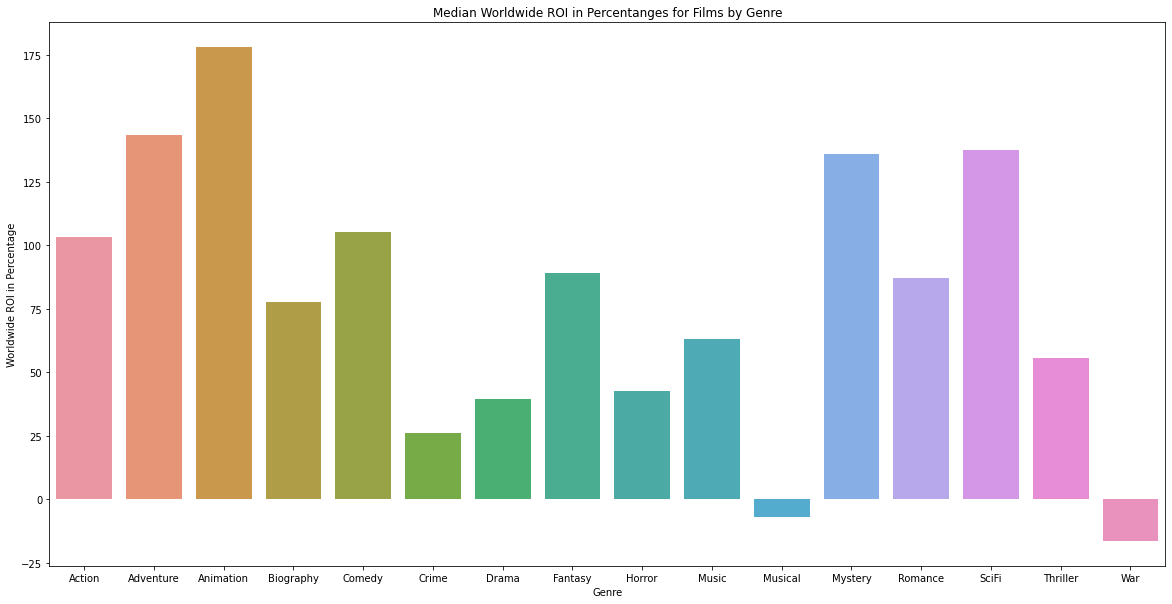

In [196]:
#graph 1: relationship between worldwide ROI and genre 
fig, ax = plt.subplots(figsize=(20, 10))


#setting x and y variables 
y1 = genre_df_medians['worldwide_ROI_perc']
x1 = genre_df_medians['genre']


#graphing variables
ax = sns.barplot(x=x1, y=y1, data=genre_df_medians)


#setting lables and titles
ax.set_title("Median Worldwide ROI in Percentanges for Films by Genre")
ax.set_ylabel("Worldwide ROI in Percentage")
ax.set_xlabel("Genre")

#Notes: The genres Musical and War both had sample sizes lower than 30 and should be weighed as less significant.
#Notes: There are some overlaps between the genres because some movies had multiple genre classifications such as Crime/Drama.
#Notes: Drama, Comedy, Action, Adventure, and Biography had the largest value counts with 1,058, 638, 509, 395, and 361, respectively.
#Notes: Highest Worldwide ROI in descending order was Animation, Adventure, SciFi, Mystery, and Comedy with 177.99, 143.29, 137.54, 135.80, and 105.12, respectively


#we can also use median as the estimator by doing this:
#from numpy import median
#y = master_data['worldwide_ROI_perc']
#x = master_data['genre']

#ax = sns.barplot(x=x, y=y, data=genre_df_medians, estimator=median).set(title="Worldwide ROI in Percentanges for Films by Genre")

#ax.set_xlabel("Genre")
#ax.set_ylabel("Worldwide ROI in Percentages")

Text(0.5, 0, 'Genre')

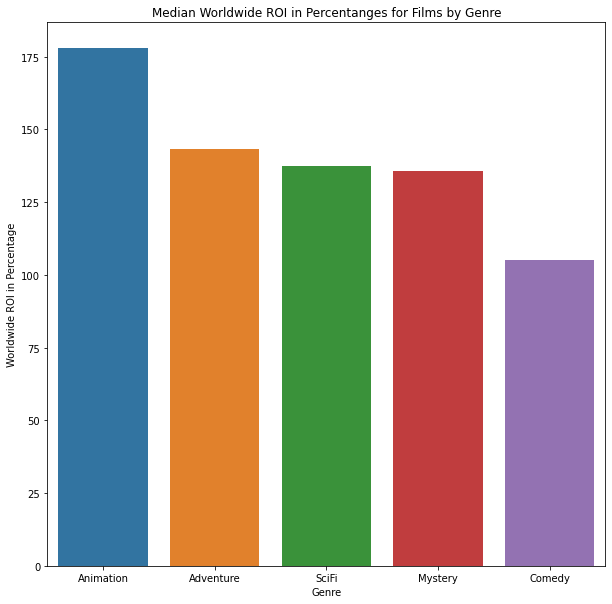

In [193]:
#graph 1: Highest worldwide ROI by genre 
fig, ax = plt.subplots(figsize=(10, 10))


#setting x and y variables 
y1 = top5_genre_ROI['worldwide_ROI_perc']
x1 = top5_genre_ROI['genre']


#graphing variables
ax = sns.barplot(x=x1, y=y1, data=top5_genre_ROI)


#setting lables and titles
ax.set_title("Median Worldwide ROI in Percentanges for Films by Genre")
ax.set_ylabel("Worldwide ROI in Percentage")
ax.set_xlabel("Genre")

#Notes: The genres Musical and War both had sample sizes lower than 30 and should be weighed as less significant.
#Notes: There are some overlaps between the genres because some movies had multiple genre classifications such as Crime/Drama.
#Notes: Drama, Comedy, Action, Adventure, and Biography had the largest value counts with 1,058, 638, 509, 395, and 361, respectively.
#Notes: Highest Worldwide ROI in descending order was Animation, Adventure, SciFi, Mystery, and Comedy with 177.99, 143.29, 137.54, 135.80, and 105.12, respectively


#we can also use median as the estimator by doing this:
#from numpy import median
#y = master_data['worldwide_ROI_perc']
#x = master_data['genres']

#ax = sns.barplot(x=x, y=y, data=genre_df_medians, estimator=median).set(title="Median Worldwide ROI in Percentanges for Films by Genre")

#ax.set_xlabel("Genre")
#ax.set_ylabel("Worldwide ROI in Percentages")